In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('measurements.csv')

In [3]:
data.head(60)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
data.isna().sum()/len(data) 

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
AC               0.000000
rain             0.000000
sun              0.000000
refill liters    0.966495
refill gas       0.966495
dtype: float64

In [6]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]

In [7]:
data.temp_inside.value_counts(dropna=False)

21,5    133
22      102
22,5     59
20       25
21       13
23       13
NaN      12
25       12
24,5      7
20,5      4
24        3
23,5      2
25,5      2
19        1
Name: temp_inside, dtype: int64

In [8]:
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [9]:
data['temp_inside'] = data['temp_inside'].astype(float)

In [10]:
data['temp_inside'] = data['temp_inside'].fillna(21.5)

In [11]:
data.temp_inside.value_counts(dropna=False)

21.5    145
22.0    102
22.5     59
20.0     25
21.0     13
23.0     13
25.0     12
24.5      7
20.5      4
24.0      3
23.5      2
25.5      2
19.0      1
Name: temp_inside, dtype: int64

In [12]:
data.specials.value_counts(dropna=False)

NaN                   295
rain                   32
sun                    27
AC rain                 9
ac                      8
AC                      6
snow                    3
sun ac                  3
AC snow                 1
half rain half sun      1
AC sun                  1
AC Sun                  1
ac rain                 1
Name: specials, dtype: int64

In [13]:
data=data.drop(columns=['specials','refill_liters','refill_gas'])

In [14]:
data.isna().sum()/len(data) 

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
ac              0.0
rain            0.0
sun             0.0
dtype: float64

In [15]:
data['distance'] = data['distance'].str.replace(',', '.')
data['distance'] = data['distance'].astype(float)

data['consume'] = data['consume'].str.replace(',', '.')
data['consume'] = data['consume'].astype(float)

In [16]:
data_categorical = data.select_dtypes(object)
data_categorical.head()

,gas_type
0,E10
1,E10
2,E10
3,E10
4,E10


In [17]:
data_numerical = data.select_dtypes(np.number)
data_numerical.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0


In [18]:
data2 = pd.read_excel('measurements2.xlsx')

In [19]:
data2.shape

(388, 12)

In [20]:
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


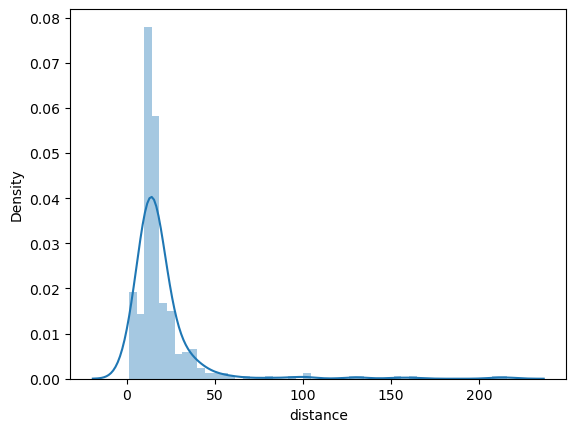

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


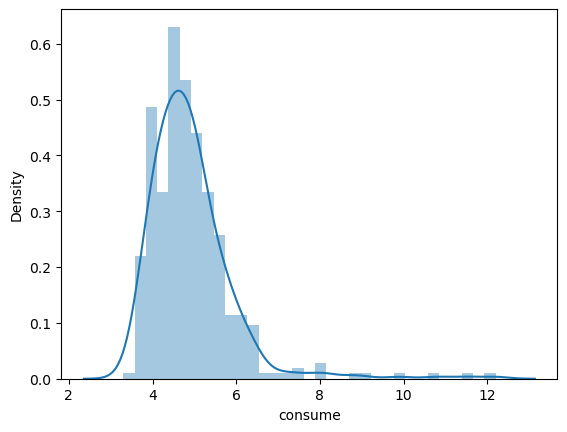

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


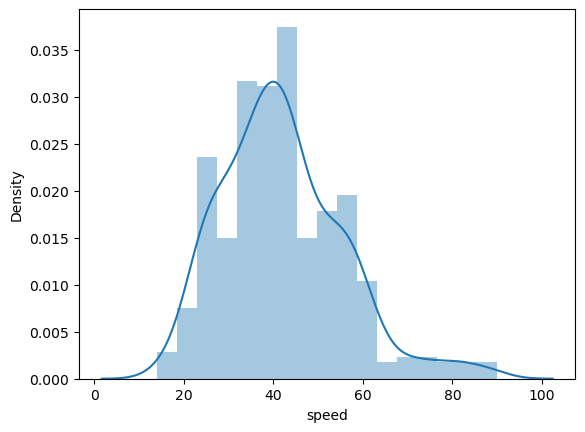

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


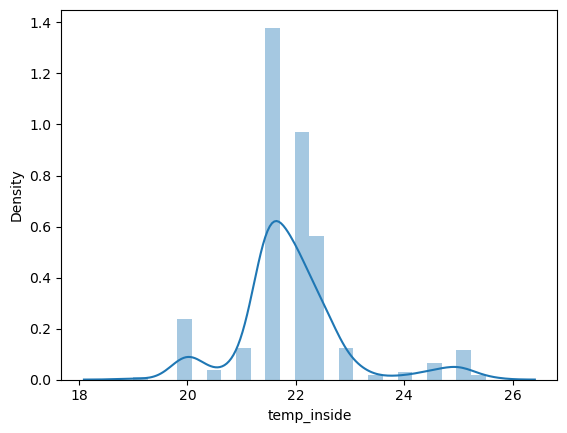

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


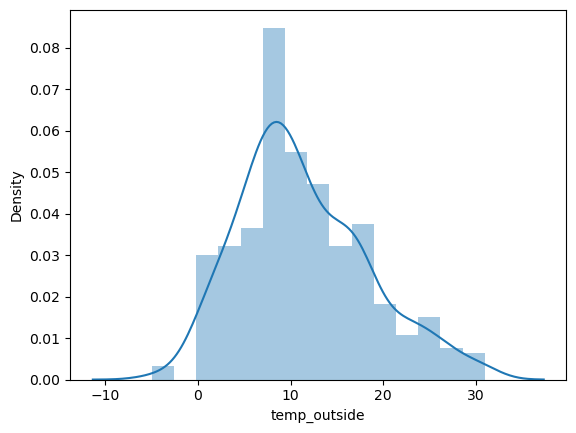

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


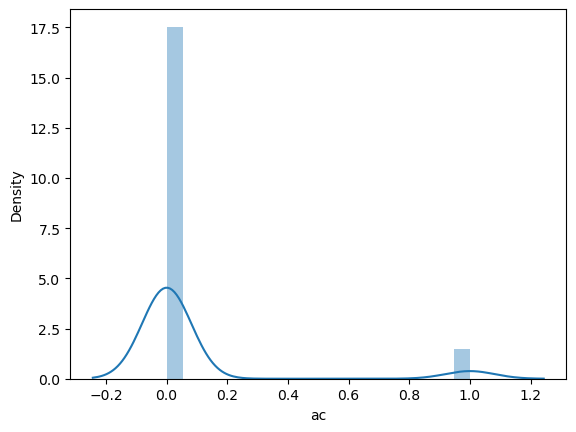

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


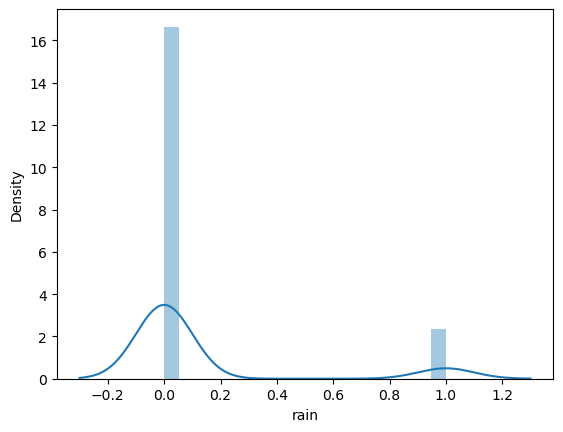

C:\Users\joanv\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


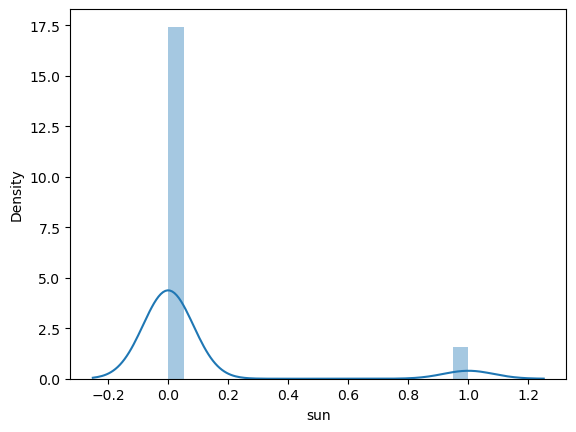

In [21]:
for column in data_numerical.columns:
    sns.distplot(data_numerical[column])
    plt.show()


(array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 228.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

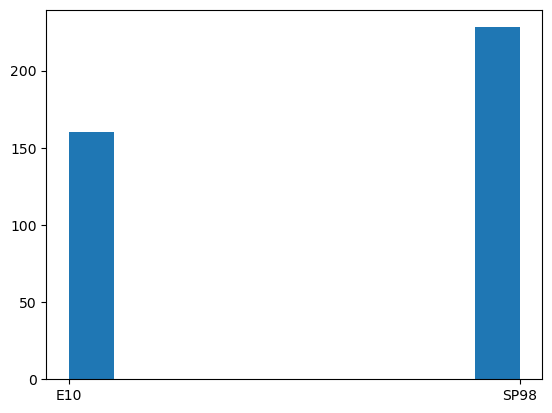

In [22]:
plt.hist(data_categorical.gas_type)

In [23]:
data.describe() 

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.916237,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.997449,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [24]:
# Ho = average consume in E10 fuel is > 6 liters
# H1 = average consume in E10 fuel is < 6 liters

E10 = data[(data['gas_type']== 'E10')]['consume']
E10


0      5.0
1      4.2
2      5.5
3      3.9
4      4.5
      ... 
344    5.1
345    4.0
346    4.8
347    3.9
348    4.6
Name: consume, Length: 160, dtype: float64

In [25]:
from scipy import stats
from scipy.stats import ttest_1samp

stat,pvalue = stats.ttest_1samp(E10,6)
print('Stat_Score =  ',stat)
print('Pvalue =  ',pvalue)

Stat_Score =   -15.004880514674818
Pvalue =   2.8725297057731383e-32


In [26]:
con_level = 0.95
df = len(E10)-1
mu = E10.mean()
se = stats.sem(E10)

conf_int = stats.t.interval(con_level,df,mu,se)
print('Confidence interval is between', conf_int)


Confidence interval is between (4.79057729018914, 5.071922709810862)


In [27]:
#The p-value is below our threshhold of .05 and the Stat_Score is negative, so we can reject the null (Ho).
#Therefore it is more likely that the average consume is less than 6 liters. Again, let's check!

In [28]:
E10.mean()

4.931250000000001

In [29]:
import sys
np.set_printoptions(threshold=sys.maxsize)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [30]:
y=data['gas_type']
X=data.drop('gas_type', axis=1)
y.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(271, 8)

(117, 8)

(271,)

(117,)

In [33]:
transformer = MinMaxScaler().fit(X_train)
X_train_norm = transformer.transform(X_train)
print(X_train_norm.shape)
X_train_scale = pd.DataFrame(X_train_norm, index = X_train.index, columns=X_train.columns)
X_train_scale.head()
X_train_scale.reset_index(drop = True, inplace = True)

(271, 8)


In [34]:
X_test_norm = transformer.transform(X_test)
print(X_test_norm.shape)
X_test_scale = pd.DataFrame(X_test_norm, index = X_test.index, columns=X_test.columns)
X_test_scale.reset_index(drop = True, inplace=True)
X_test_scale

(117, 8)


,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,0.013501,0.258427,0.236842,0.461538,0.657143,0.0,0.0,0.0
1,0.060056,0.202247,0.236842,0.384615,0.342857,0.0,0.0,0.0
2,0.051210,0.314607,0.342105,0.384615,0.314286,0.0,0.0,0.0
3,0.048417,0.146067,0.302632,0.384615,0.314286,0.0,0.0,0.0
4,0.079143,0.112360,0.421053,0.461538,0.600000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
112,0.048883,0.314607,0.026316,0.538462,0.314286,0.0,1.0,0.0
113,0.114525,0.044944,0.328947,0.153846,0.742857,0.0,0.0,0.0
114,0.071229,0.202247,0.552632,0.307692,0.342857,0.0,0.0,0.0
115,0.048883,0.202247,0.236842,0.384615,0.228571,0.0,0.0,0.0


In [35]:
data_scaled = pd.concat([X_train,y_train],axis = 1)
data_scaled.head(10)

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
24,12.3,5.9,62,21.5,6,0,0,0,E10
379,16.7,3.8,44,24.5,23,0,0,1,SP98
339,15.4,4.1,45,22.0,24,0,0,0,E10
272,101.9,5.2,75,22.0,18,0,0,0,E10
286,37.2,4.0,45,22.0,20,0,0,1,SP98
373,15.3,6.6,16,24.0,27,1,0,0,SP98
150,16.8,4.0,46,21.5,8,0,0,0,E10
172,35.8,4.4,51,21.5,6,0,0,0,E10
253,17.0,3.9,46,22.5,14,0,0,1,E10
383,16.0,3.7,39,24.5,18,0,0,0,SP98


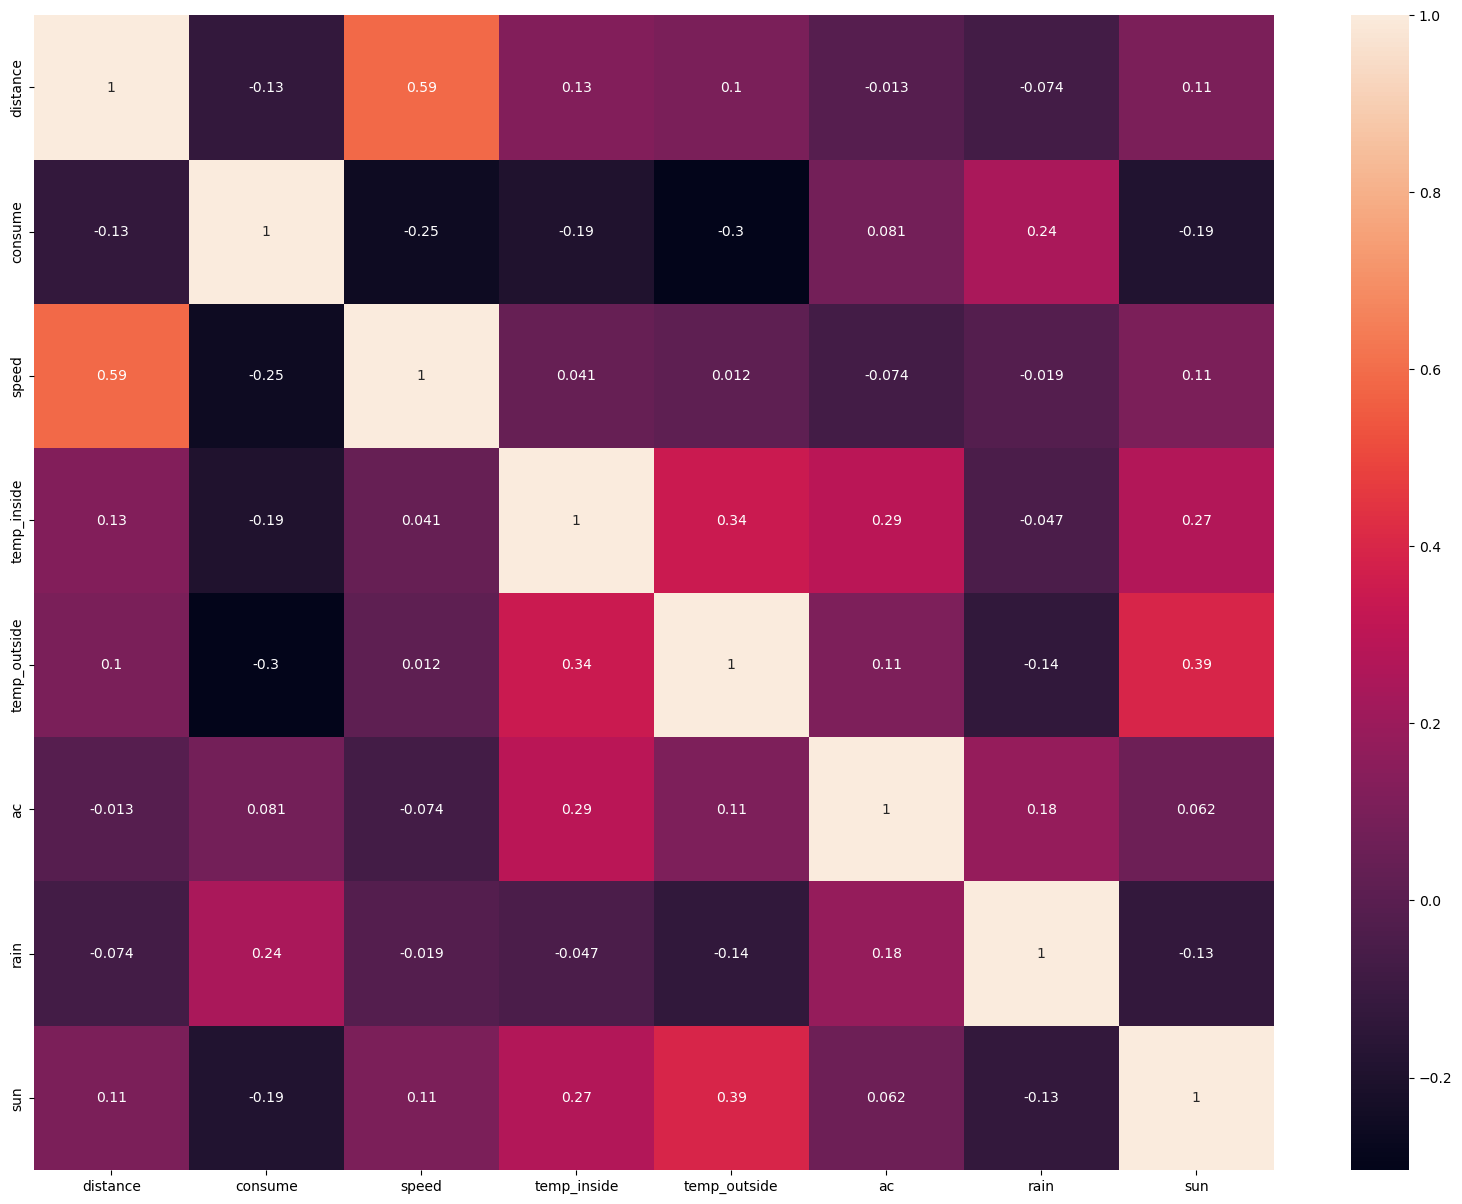

In [36]:
corr_matrix = data_scaled.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train, y_train)
print('TrainSet = ',clf.score(X_train, y_train))
print('TestSet = ',clf.score(X_test, y_test))

TrainSet =  0.6531365313653137
TestSet =  0.5982905982905983


In [38]:
pred_RF = clf.predict(X_test)

In [39]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

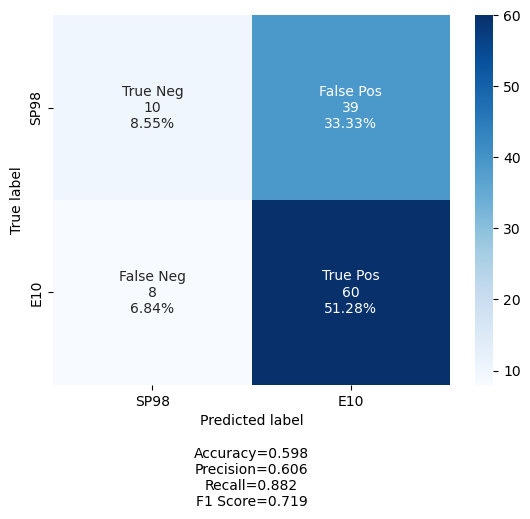

In [40]:
cf_matrix = confusion_matrix(y_test, pred_RF)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['SP98','E10']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap=plt.cm.Blues)

In [41]:
array = confusion_matrix(y_test, pred_RF)
Q1 = array[0][0]
Q2 = array[0][1]
Q3 = array[1][0]
Q4 = array[1][1]
print(Q1)
print(Q2)
print(Q3)
print(Q4)
print(categories[0])
print(categories[1])

10
39
8
60
SP98
E10


In [42]:
print('In the above plot we can see that there are',Q3,'cars of whom the model predicts they will be',categories[0], 'when they actually are',categories[1],'.')
print('There are also', Q2 ,'cars of whom the model predicts they will be',categories[1],'when they actually are not.')

In the above plot we can see that there are 8 cars of whom the model predicts they will be SP98 when they actually are E10 .
There are also 39 cars of whom the model predicts they will be E10 when they actually are not.


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   ac            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [44]:
data.to_csv('data_cleaned.csv', index=True, sep=',', encoding='utf-8')